In [2]:
import mysql.connector

In [6]:
import sqlalchemy as sa

In [ ]:
engine = sqlalchemy.create_engine('mssql://qe/banking?trusted_connection=yes')

In [3]:
connection = mysql.connector.connect(
                  host="localhost",
                  user="root",
                  password="12345678",
                  database="banking")

In [4]:
import numpy as np
import pandas as pd

cloud computing: internet

- Hard drive --> stored --> third party
- CRUD: Create, Read, Update, Delete.
- user and password:
    - Authentication: Who you are?
    - Authorization: What right do you grant?

In [9]:
sql = "SELECT c.CUST_ID, AVAIL_BALANCE FROM CUSTOMER c \
	LEFT JOIN ACCOUNT a ON c.CUST_ID = a.CUST_ID ORDER BY AVAIL_BALANCE DESC LIMIT 3"
account = pd.read_sql(sql, connection)

In [10]:
account

,CUST_ID,AVAIL_BALANCE
0,13,50000.0
1,12,38552.1
2,10,23575.1


In [11]:
sql = "SELECT * FROM ACCOUNT"
account_df = pd.read_sql(sql, connection)

sql = "SELECT * FROM CUSTOMER"
customer_df = pd.read_sql(sql, connection)

In [12]:
account_df.merge(customer_df, on='CUST_ID', how='inner')[['CUST_ID', 'AVAIL_BALANCE']].\
        sort_values('AVAIL_BALANCE', ascending=False).head(3)

,CUST_ID,AVAIL_BALANCE
23,13,50000.0
22,12,38552.1
19,10,23575.1


In [15]:
sql = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'banking'"
pd.read_sql(sql, connection)

,TABLE_NAME
0,ACC_TRANSACTION
1,ACCOUNT
2,BRANCH
3,BUSINESS
4,CUSTOMER
5,DEPARTMENT
6,EMPLOYEE
7,INDIVIDUAL
8,OFFICER
9,PRODUCT


### READ

Software:
- mssql server management studio: software manage mssl server (connection, schema, view, ..)
- mysql workbench

Server side:
    - mssql server: algorithms (tree) organize data structures
    - mysql server: algorithms (tree, R, R+, A, A*) organize data structures

- SQL: structural query language (mssql server, mysql server, oracle server, postgres server, ...), (siquel) --> Table
- NoSQL: Non-SQL, documents

In [18]:
sql = "SELECT * FROM account"
pd.read_sql(sql, connection).head(2)

,ACCOUNT_ID,AVAIL_BALANCE,CLOSE_DATE,LAST_ACTIVITY_DATE,OPEN_DATE,PENDING_BALANCE,STATUS,CUST_ID,OPEN_BRANCH_ID,OPEN_EMP_ID,PRODUCT_CD
0,1,1057.75,None,2005-01-04,2000-01-15,1057.75,ACTIVE,1,2,10,CHK
1,2,500.00,None,2004-12-19,2000-01-15,500.00,ACTIVE,1,2,10,SAV


In [19]:
sql = "SELECT * FROM account LIMIT 2"
pd.read_sql(sql, connection)

,ACCOUNT_ID,AVAIL_BALANCE,CLOSE_DATE,LAST_ACTIVITY_DATE,OPEN_DATE,PENDING_BALANCE,STATUS,CUST_ID,OPEN_BRANCH_ID,OPEN_EMP_ID,PRODUCT_CD
0,1,1057.75,None,2005-01-04,2000-01-15,1057.75,ACTIVE,1,2,10,CHK
1,2,500.00,None,2004-12-19,2000-01-15,500.00,ACTIVE,1,2,10,SAV


In [20]:
sql = "SELECT account_id, avail_balance FROM account LIMIT 2"
pd.read_sql(sql, connection)

,account_id,avail_balance
0,1,1057.75
1,2,500.00


In [27]:
sql = "SELECT a.cust_id, avail_balance FROM account a \
            INNER JOIN customer c ON a.cust_id = c.cust_id"
pd.read_sql(sql, connection)

,cust_id,avail_balance
0,1,1057.75
1,1,500.00
2,1,3000.00
3,2,2258.02
4,2,200.00
5,3,1057.75
6,3,2212.50
7,4,534.12
8,4,767.77
9,4,5487.09


In [29]:
sql = "SELECT a.cust_id, SUM(avail_balance) AS sum_balance FROM account a \
            INNER JOIN customer c ON a.cust_id = c.cust_id GROUP BY a.cust_id"
pd.read_sql(sql, connection)

,cust_id,sum_balance
0,1,4557.750000
1,2,2458.020020
2,3,3270.250000
3,4,6788.979858
4,5,2237.969971
5,6,10122.370003
6,7,5000.000000
7,8,3875.179932
8,9,10971.219803
9,10,23575.119141


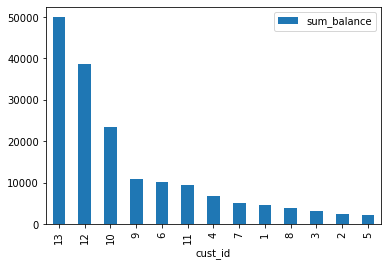

In [32]:
sql = "SELECT a.cust_id, SUM(avail_balance) AS sum_balance FROM account a \
            INNER JOIN customer c ON a.cust_id = c.cust_id GROUP BY a.cust_id ORDER BY sum_balance DESC"
pd.read_sql(sql, connection).plot(kind='bar', x='cust_id', y='sum_balance');

In [41]:
sql = "SELECT a.cust_id, CONCAT(first_name, ' ', last_name) AS full_name, birth_date, avail_balance FROM account a \
            INNER JOIN customer c ON a.cust_id = c.cust_id \
            INNER JOIN individual i ON c.cust_id = i.cust_id"
df = pd.read_sql(sql, connection, parse_dates=['birth_date'])
df

,cust_id,full_name,birth_date,avail_balance
0,1,James Hadley,1972-04-22,1057.75
1,1,James Hadley,1972-04-22,500.00
2,1,James Hadley,1972-04-22,3000.00
3,2,Susan Tingley,1968-08-15,2258.02
4,2,Susan Tingley,1968-08-15,200.00
5,3,Frank Tucker,1958-02-06,1057.75
6,3,Frank Tucker,1958-02-06,2212.50
7,4,John Hayward,1966-12-22,534.12
8,4,John Hayward,1966-12-22,767.77
9,4,John Hayward,1966-12-22,5487.09


In [47]:
df = pd.DataFrame(np.linspace(1, 100, 100).reshape(25, 4), columns=['col_1', 'col_2', 'col_3', 'col_3'])
df.head(2)

,col_1,col_2,col_3,col_3
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0


In [48]:
df.loc[(df.col_2 > 50) & (df.col_2 < 80), 'col_2'] = pd.NA

In [52]:
df.isna().mean() * 100

col_1     0.0
col_2    28.0
col_3     0.0
col_3     0.0
dtype: float64

In [53]:
df.isna().sum() / df.shape[0] * 100

col_1     0.0
col_2    28.0
col_3     0.0
col_3     0.0
dtype: float64

In [57]:
# Nam, Nu, Null
df = pd.DataFrame(np.random.choice(['Male', 'Female', np.nan], size=100), columns=['gender'])
df.loc[df.gender == 'nan', 'gender'] = np.nan

In [60]:
df.gender.isnull().sum()

30

In [61]:
pd.options.display.max_rows = 200

In [64]:
df.gender.value_counts(dropna=False)

Female    36
Male      34
NaN       30
Name: gender, dtype: int64

In [67]:
df.groupby('gender', dropna=False).gender.count()

gender
Female    36
Male      34
NaN        0
Name: gender, dtype: int64

In [ ]:
# Math: Linear Algebra, Statistic and Probability, Calculus